In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from moderation_experiment_DD_PDXP import Moderation_Experiment_DDPDXP
from moderation_experiment_DT_PDXP import Moderation_Experiment_DTPDXP

# from neutrons_code import Capsule
# from neutrons_code.functions import neutron_counting, widths

from neutrons_code_L import Capsule
from neutrons_code_L.functions import neutron_counting, widths

In [2]:
import scienceplots
plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams.update({'figure.dpi': '300'})

# plt.style.use('default')

In [3]:
# create control case of 0 hydrogen for both fuel types

En = np.geomspace(1e-5, 16, 500)[::-1]
w = widths(En)

unmoderated_DT_params = np.array([[1e30, 0.5, 0.5, 0, 0, 450e-6],
                                  [1e30, 0, 0, 0, 1, 50e-6]])

unmoderated_D_params = np.array([[1e30, 0, 1, 0, 0, 450e-6],
                                  [1e30, 0, 0, 0, 1, 50e-6]])

no_targets = [None, None]

unmod_DT_capsule = Capsule(En, unmoderated_DT_params, no_targets)
unmod_DT_capsule.solve_neutron_transport()
unmod_D_capsule = Capsule(En, unmoderated_D_params, no_targets)
unmod_D_capsule.solve_neutron_transport()

initialising NeSST


/Users/brynlloyd/Library/Python/3.9/lib/python/site-packages/NeSST/spectral_model.py:164: RuntimeWarning: invalid value encountered in sqrt
  kin_a  = np.sqrt((self.A/(self.A+1))**2*(1.0+(self.A+1)/self.A*self.inelastic_Q/Ei))


time taken to solve ODEs: 0.27858471870422363
time taken to solve ODEs: 0.48718714714050293


In [4]:
experiment_DD = Moderation_Experiment_DDPDXP(30)
experiment_DT = Moderation_Experiment_DTPDXP(30)

print(experiment_DD.H_fraction_hotspot)
print(experiment_DD.H_fraction_ablator)



experiment_DD.run_experiment()
experiment_DT.run_experiment()

[0.         0.01206897 0.02413793 0.0362069  0.04827586 0.06034483
 0.07241379 0.08448276 0.09655172 0.10862069 0.12068966 0.13275862
 0.14482759 0.15689655 0.16896552 0.18103448 0.19310345 0.20517241
 0.21724138 0.22931034 0.24137931 0.25344828 0.26551724 0.27758621
 0.28965517 0.30172414 0.3137931  0.32586207 0.33793103 0.35      ]
[0.         0.03246596 0.06493193 0.09739789 0.12986385 0.16232981
 0.19479578 0.22726174 0.2597277  0.29219366 0.32465963 0.35712559
 0.38959155 0.42205751 0.45452348 0.48698944 0.5194554  0.55192136
 0.58438733 0.61685329 0.64931925 0.68178521 0.71425118 0.74671714
 0.7791831  0.81164906 0.84411503 0.87658099 0.90904695 0.94151292]
run 1 of 30
time taken to solve ODEs: 0.32245302200317383
time taken to solve ODEs: 0.7281677722930908
run 2 of 30
time taken to solve ODEs: 0.43060302734375
time taken to solve ODEs: 0.3007380962371826
run 3 of 30
time taken to solve ODEs: 0.23531103134155273
time taken to solve ODEs: 0.23122382164001465
run 4 of 30
time take

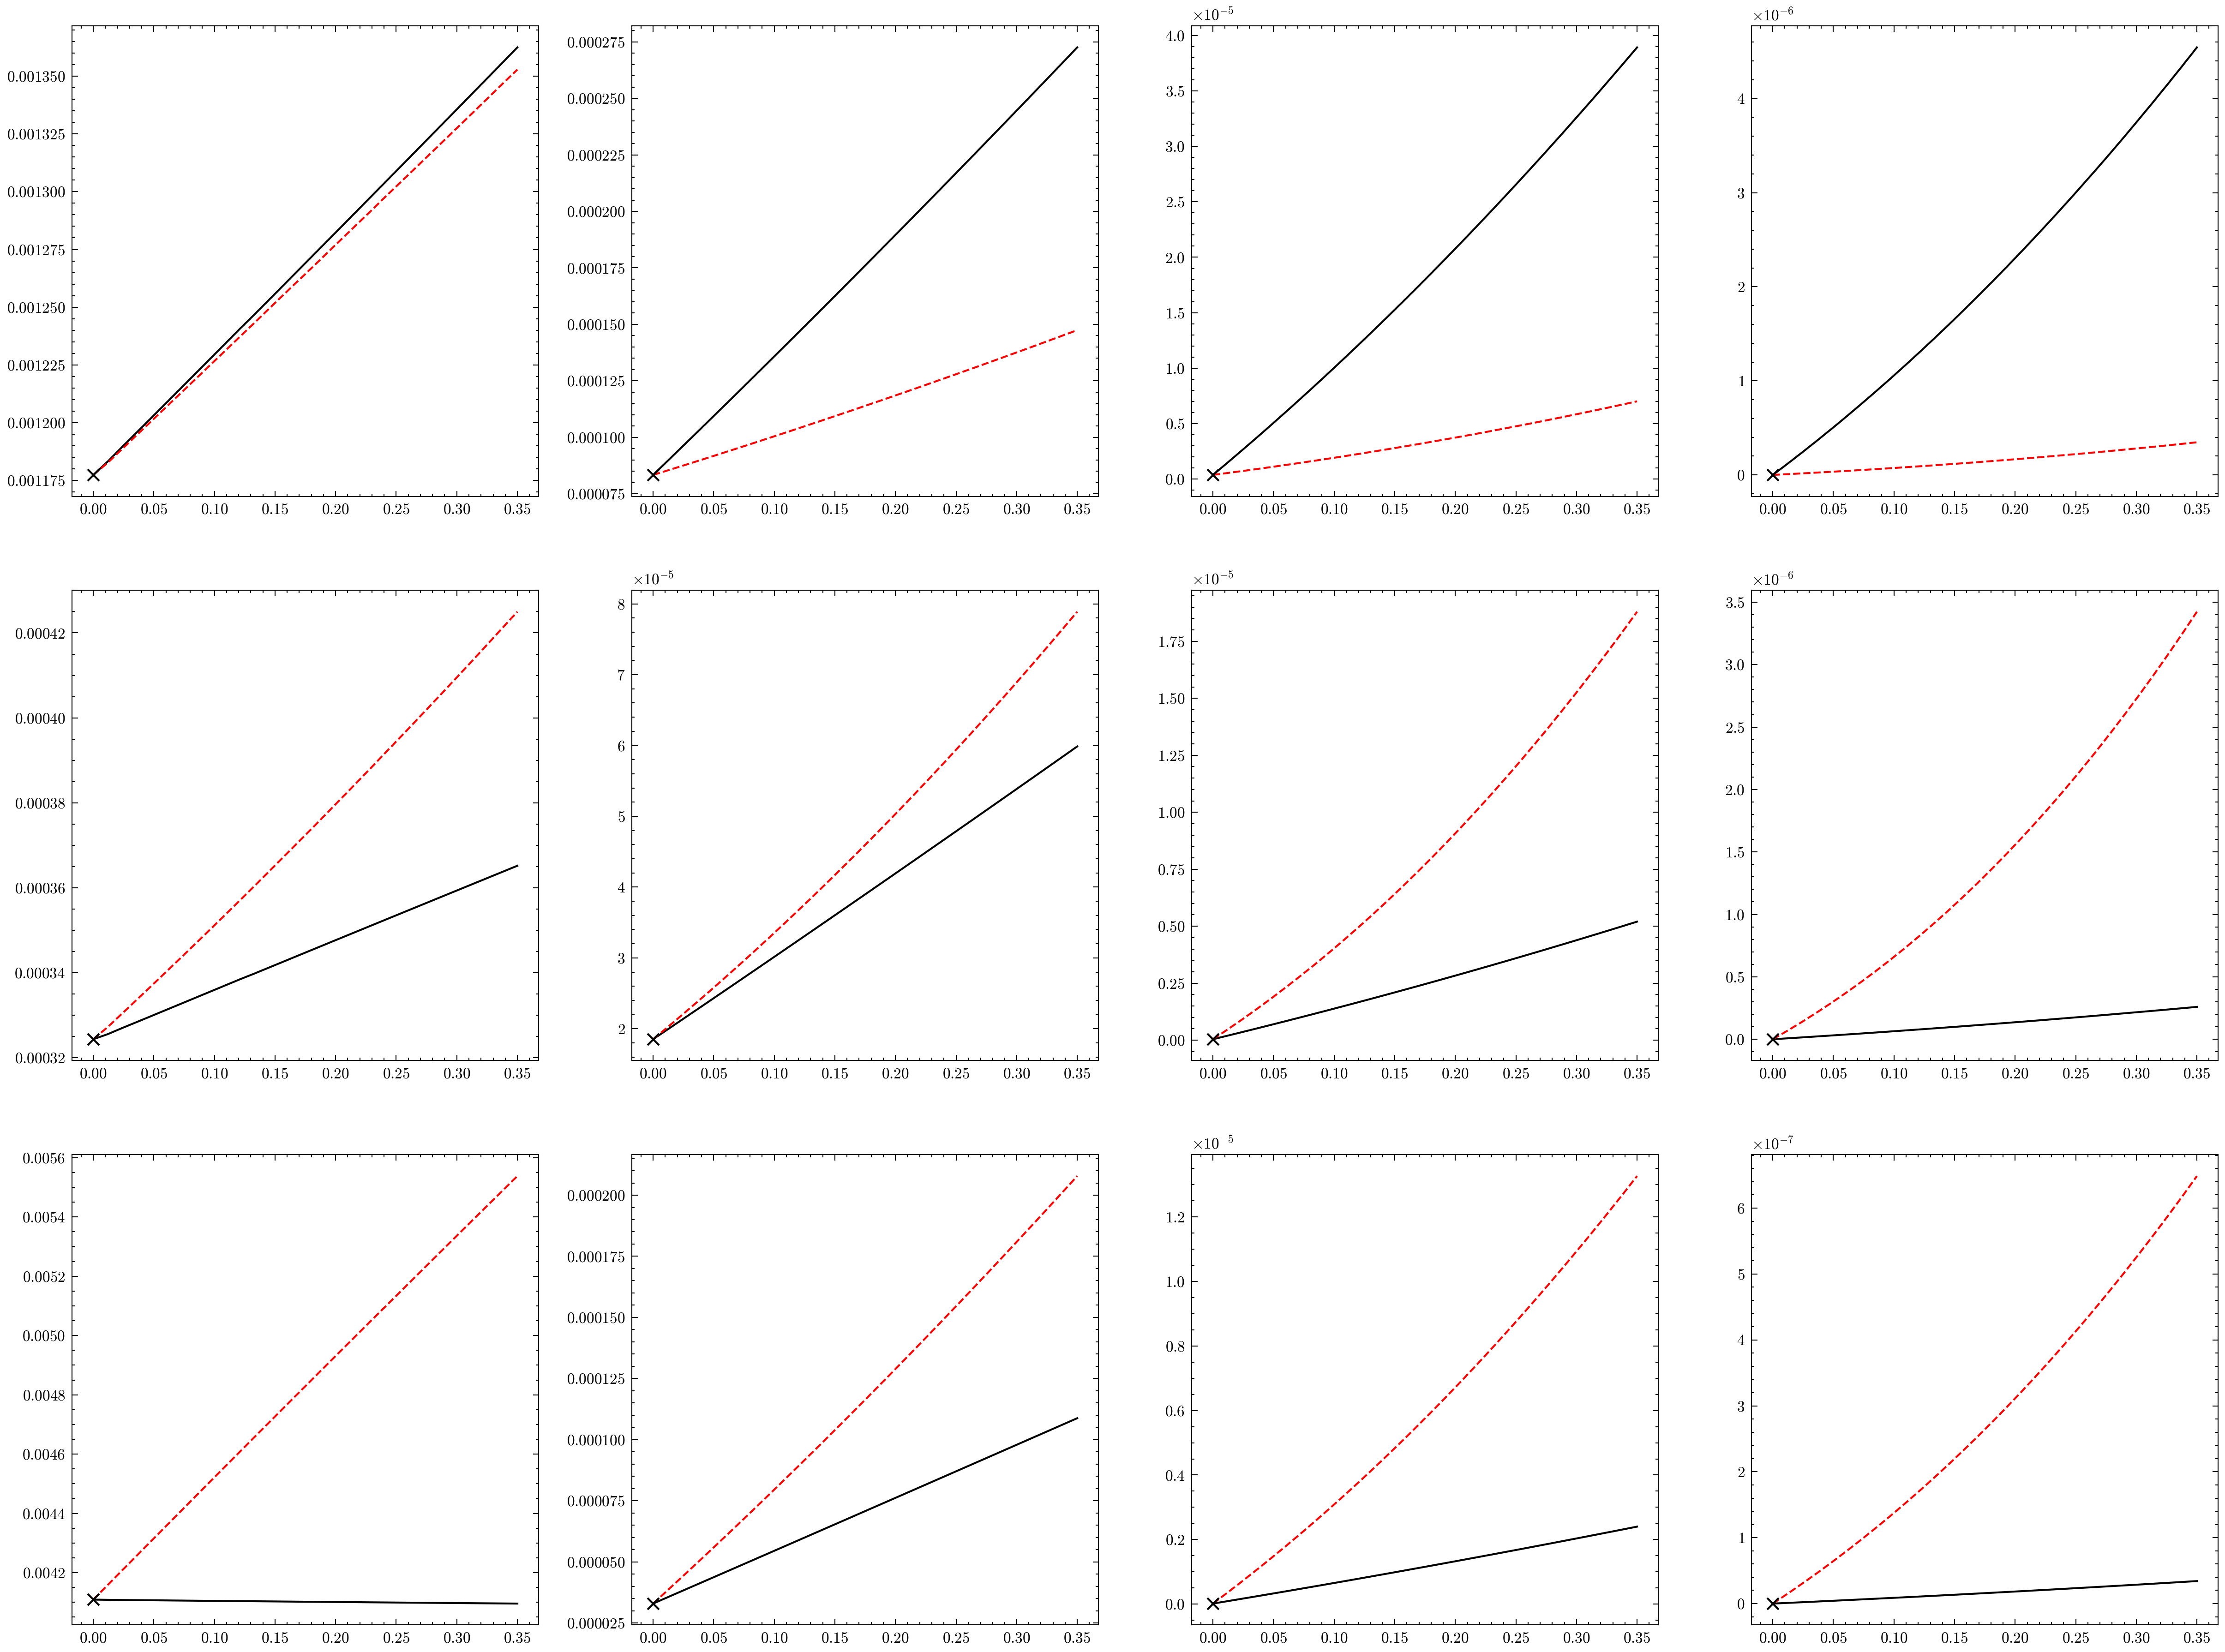

In [5]:
experiment = experiment_DD

fig,axs = plt.subplots(3,4, figsize=(20,15))

x_vals = experiment.H_fraction_hotspot

for i,x in enumerate(['1MeV', '100keV', '10keV', '1keV']):

    # axs[0,i] = hotspot
    axs[0,i].plot(x_vals, experiment.final_results_hotspot[f's{x}_0'])
    axs[0,i].plot(x_vals, experiment.final_results_ablator[f's{x}_0'])

    # axs[1,i] = ablator
    axs[1,i].plot(x_vals, experiment.final_results_hotspot[f's{x}_1'])
    axs[1,i].plot(x_vals, experiment.final_results_ablator[f's{x}_1'])

    # axs[2,i] = outside
    axs[2,i].plot(x_vals, experiment.final_results_hotspot[f's{x}_2'])
    axs[2,i].plot(x_vals, experiment.final_results_ablator[f's{x}_2'])


results_unmod_DD = neutron_counting(unmod_D_capsule, experiment_DD.time)
results_unmod_DT = neutron_counting(unmod_DT_capsule, experiment_DT.time)

for i,x in enumerate(['1MeV', '100keV', '10keV', '1keV']):
    axs[0,i].plot([0], results_unmod_DD[f's{x}_0'], 'x', color='k')
    axs[1,i].plot([0], results_unmod_DD[f's{x}_1'], 'x', color='k')
    axs[2,i].plot([0], results_unmod_DD[f's{x}_2'], 'x', color='k')

    # axs[0,i].plot([0], results_unmod_DT[f's{x}_0'], 'x', color='k')
    # axs[1,i].plot([0], results_unmod_DT[f's{x}_1'], 'x', color='k')
    # axs[2,i].plot([0], results_unmod_DT[f's{x}_2'], 'x', color='k')




# ax.plot([0], results_unmod_DD[f'{energy_range}_0']/1e7, 'x', color='C0')
# axs[1].plot([0], results_unmod_DD[f'{energy_range}_1']/1e4, 'x', color='C0')

# ax.plot([0], results_unmod_DT[f'{energy_range}_0']/1e7, 'x', color='C1')
# axs[1].plot([0], results_unmod_DT[f'{energy_range}_1']/1e4, 'x', color='C1')

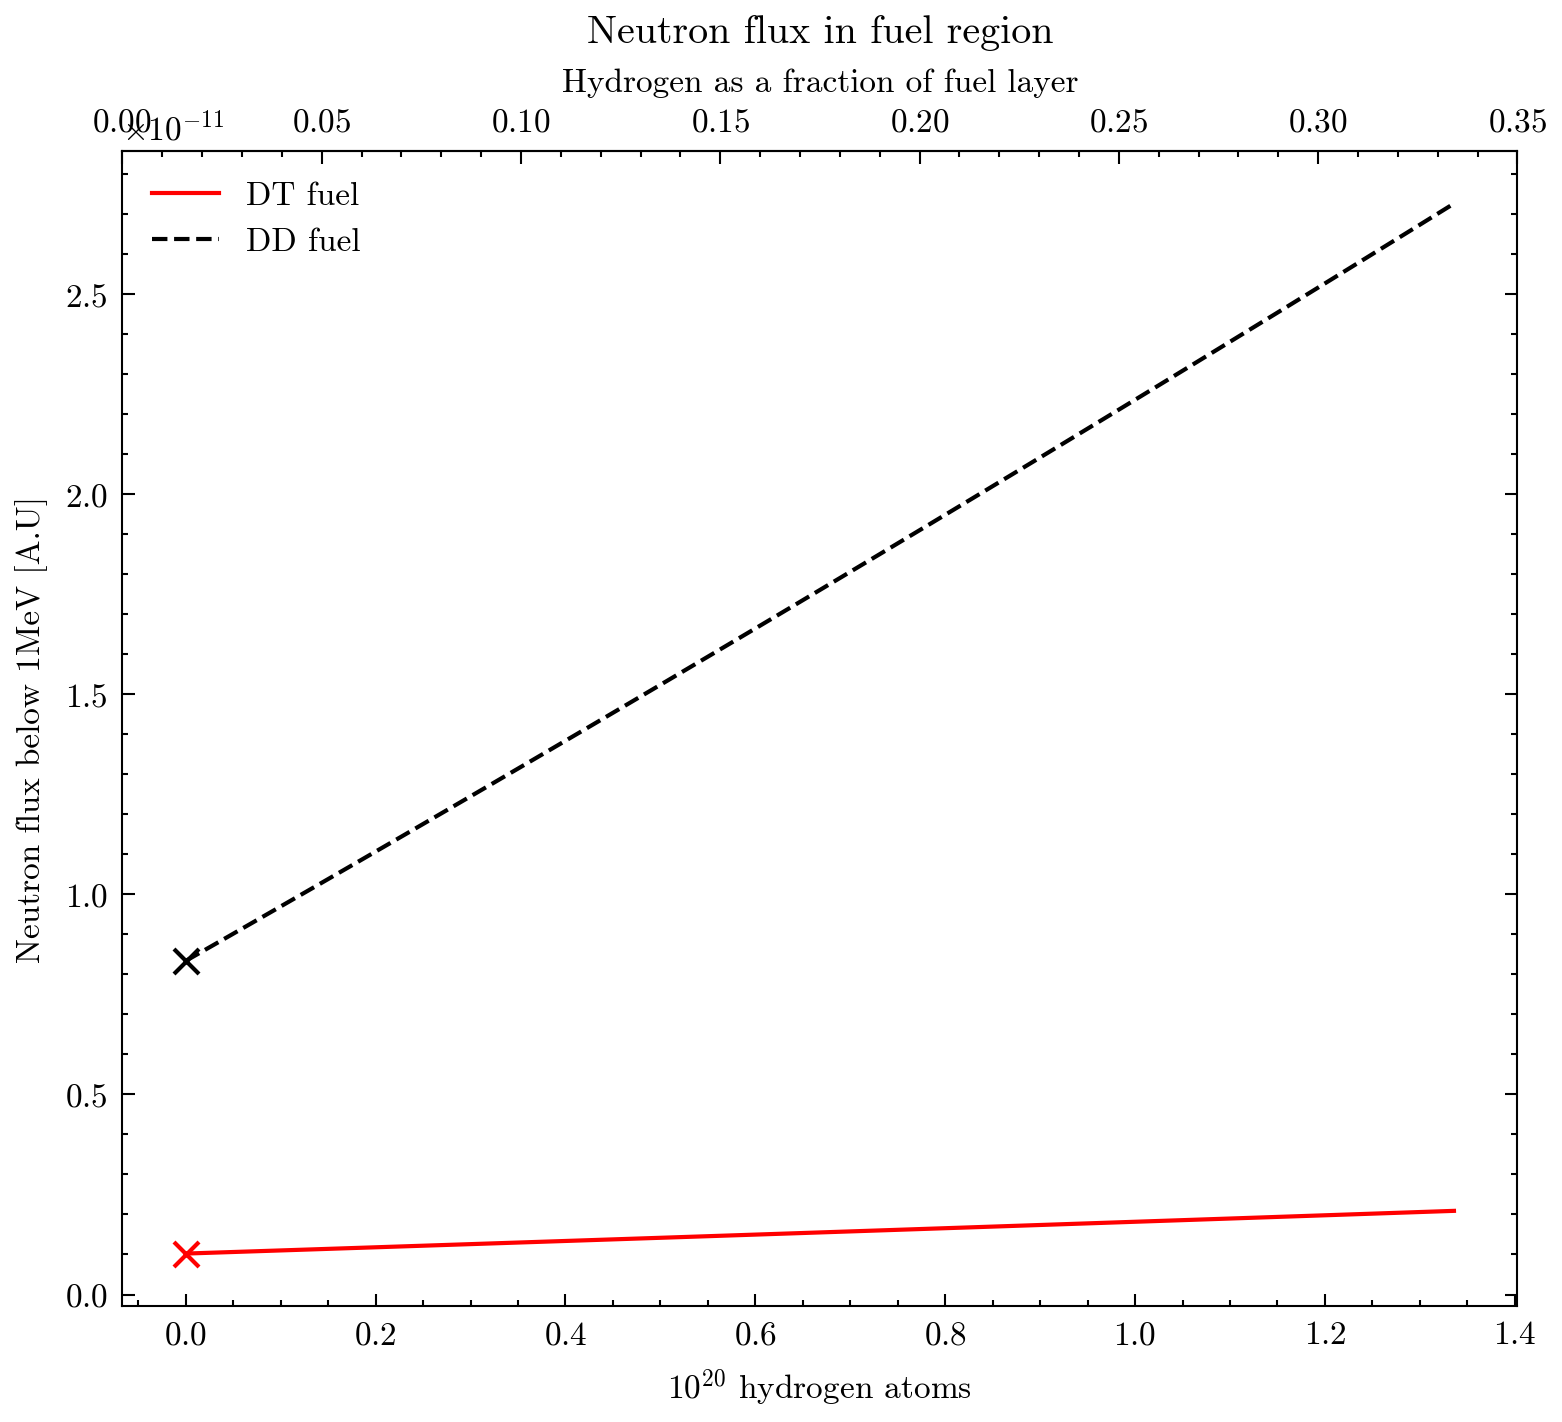

In [6]:
# compare moderation in DT vs D PDXP capsule to see which one to test further
# this one can change linspace in the experiment classes so that it goes to 100% hydrogen

fig,ax = plt.subplots(1, figsize=(6,5))
plt.subplots_adjust(hspace=0.4)

def forward(x):
    return np.interp(x, experiment.N_hydrogen/1e20, experiment.H_fraction_hotspot)
def inverse(x):
    return np.interp(x, experiment.H_fraction_hotspot, experiment.N_hydrogen/1e20)

secax0 = ax.secondary_xaxis('top', functions=(forward,inverse))
secax0.set_xlabel('Hydrogen as a fraction of fuel layer')
ax.tick_params(axis = 'x', which = 'both', bottom = True, labelbottom = True, top = False, labeltop = False)

# secax1 = axs[1].secondary_xaxis('top', functions=(forward,inverse))
# secax1.set_xlabel('Hydrogen as a fraction of fuel layer')
# axs[1].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom = True, top = False, labeltop = False)

energy_range = 's100keV'

# =====================================================================================================
experiment = experiment_DT

ax.plot(experiment.N_hydrogen/1e20, experiment.final_results_hotspot[f'{energy_range}_0']/1e7, label='DT fuel', color='C1')
# axs[0].plot(experiment.N_hydrogen/1e20, experiment.final_results_ablator[f'{energy_range}_0']/1e4)

# axs[1].plot(experiment.N_hydrogen/1e20, experiment.final_results_hotspot[f'{energy_range}_1']/1e4, label='DT fuel')
# axs[1].plot(experiment.N_hydrogen/1e20, experiment.final_results_ablator[f'{energy_range}_1']/1e4, label='Hydrogen in ablator')

ax.set_title('Neutron flux in fuel region')
# axs[1].set_title('Neutron flux in ablator')
# =====================================================================================================
experiment = experiment_DD

ax.plot(experiment.N_hydrogen/1e20, experiment.final_results_hotspot[f'{energy_range}_0']/1e7, label='DD fuel', color='C0')
# axs[0].plot(experiment.N_hydrogen/1e20, experiment.final_results_ablator[f'{energy_range}_0']/1e4)

# axs[1].plot(experiment.N_hydrogen/1e20, experiment.final_results_hotspot[f'{energy_range}_1']/1e4, label='D fuel')
# axs[1].plot(experiment.N_hydrogen/1e20, experiment.final_results_ablator[f'{energy_range}_1']/1e4, label='Hydrogen in ablator')

ax.set_title('Neutron flux in fuel region')
# axs[1].set_title('Neutron flux in ablator')
# =====================================================================================================
# plot control case
# just as a check dont have this in pretty graph

results_unmod_DD = neutron_counting(unmod_D_capsule, experiment_DD.time)
ax.plot([0], results_unmod_DD[f'{energy_range}_0']/1e7, 'x', color='C0')
# axs[1].plot([0], results_unmod_DD[f'{energy_range}_1']/1e4, 'x', color='C0')

results_unmod_DT = neutron_counting(unmod_DT_capsule, experiment_DT.time)
ax.plot([0], results_unmod_DT[f'{energy_range}_0']/1e7, 'x', color='C1')
# axs[1].plot([0], results_unmod_DT[f'{energy_range}_1']/1e4, 'x', color='C1')
# =====================================================================================================





# for ax in axs:
ax.set_xlabel(r'$10^{20}$ hydrogen atoms')
ax.set_ylabel('Neutron flux below 1MeV [A.U]')

# ax.set_xlim((-0.01,0.01))
# ax.set_ylim((0,0.5))

ax.legend()

/var/folders/xc/2_ntp2sx48xfz3shx6x3tk_w0000gn/T/ipykernel_57246/4006008248.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = experiment_DT.final_results_hotspot[f'{energy_range}_{layer}'] / np.float64(results_unmod_DT[f'{energy_range}_{layer}'])
/var/folders/xc/2_ntp2sx48xfz3shx6x3tk_w0000gn/T/ipykernel_57246/4006008248.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = experiment_DD.final_results_hotspot[f'{energy_range}_{layer}'] / np.float64(results_unmod_DD[f'{energy_range}_{layer}'])


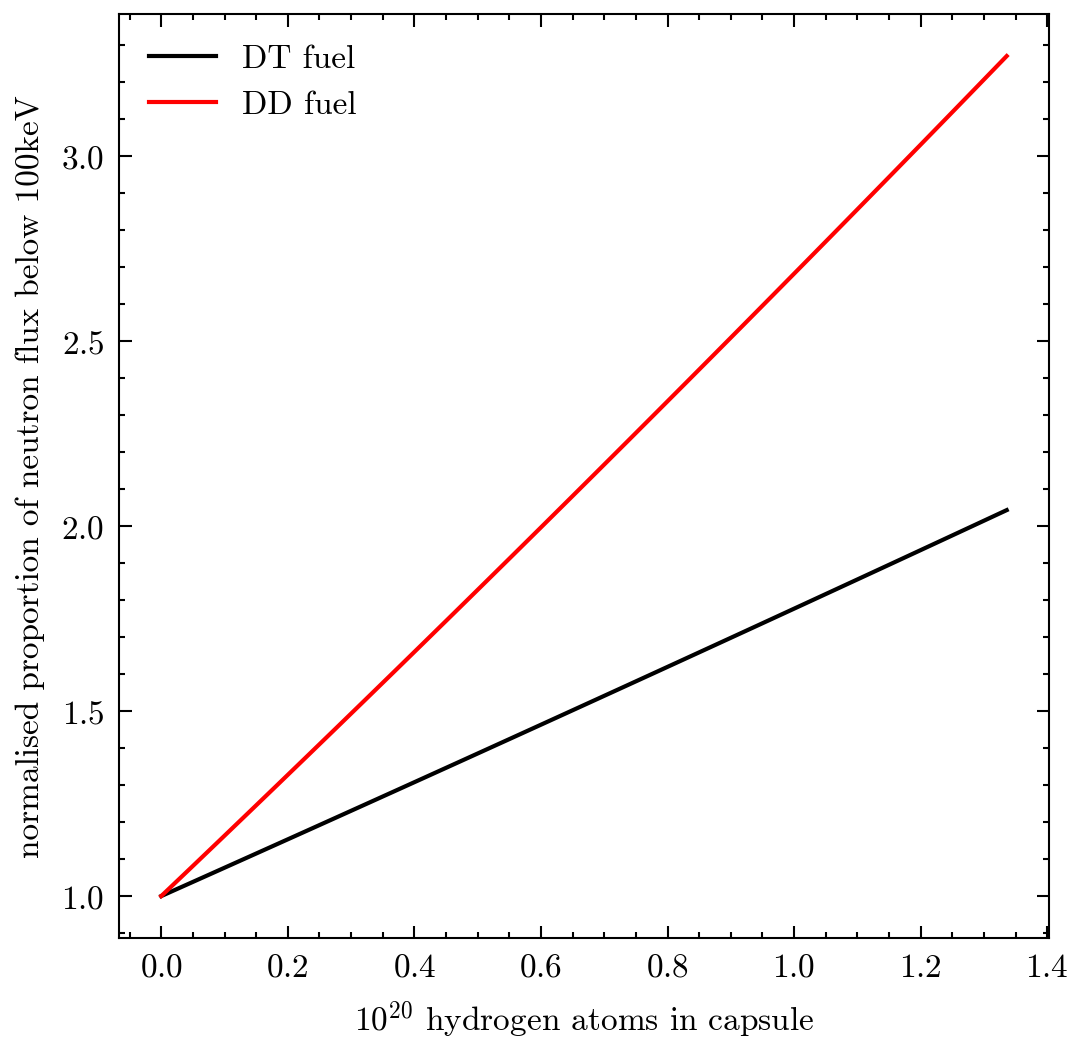

In [55]:
# extent to which it is more effective to moderate a DD capsule increases the lower in energy you go

fig,ax = plt.subplots(figsize=(4,4))

energy_range = 's100keV'
layer = 0

y = experiment_DT.final_results_hotspot[f'{energy_range}_{layer}'] / np.float64(results_unmod_DT[f'{energy_range}_{layer}'])
ax.plot(experiment.N_hydrogen/1e20, y, '-', label='DT fuel')

y = experiment_DD.final_results_hotspot[f'{energy_range}_{layer}'] / np.float64(results_unmod_DD[f'{energy_range}_{layer}'])
ax.plot(experiment_DD.N_hydrogen/1e20, y, '-', label='DD fuel')

plt.legend()
plt.ylabel('normalised proportion of neutron flux below 100keV')
plt.xlabel(r'$10^{20}$ hydrogen atoms in capsule')

# plt.savefig('/Users/brynlloyd/Desktop/moderation_fuel_comparison.png', dpi=600)


/var/folders/xc/2_ntp2sx48xfz3shx6x3tk_w0000gn/T/ipykernel_57246/407426566.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  divisor0, divisor1 = [np.float64(results_unmod_DD[f'{energy_range}_0']), np.float64(results_unmod_DD[f'{energy_range}_1'])]


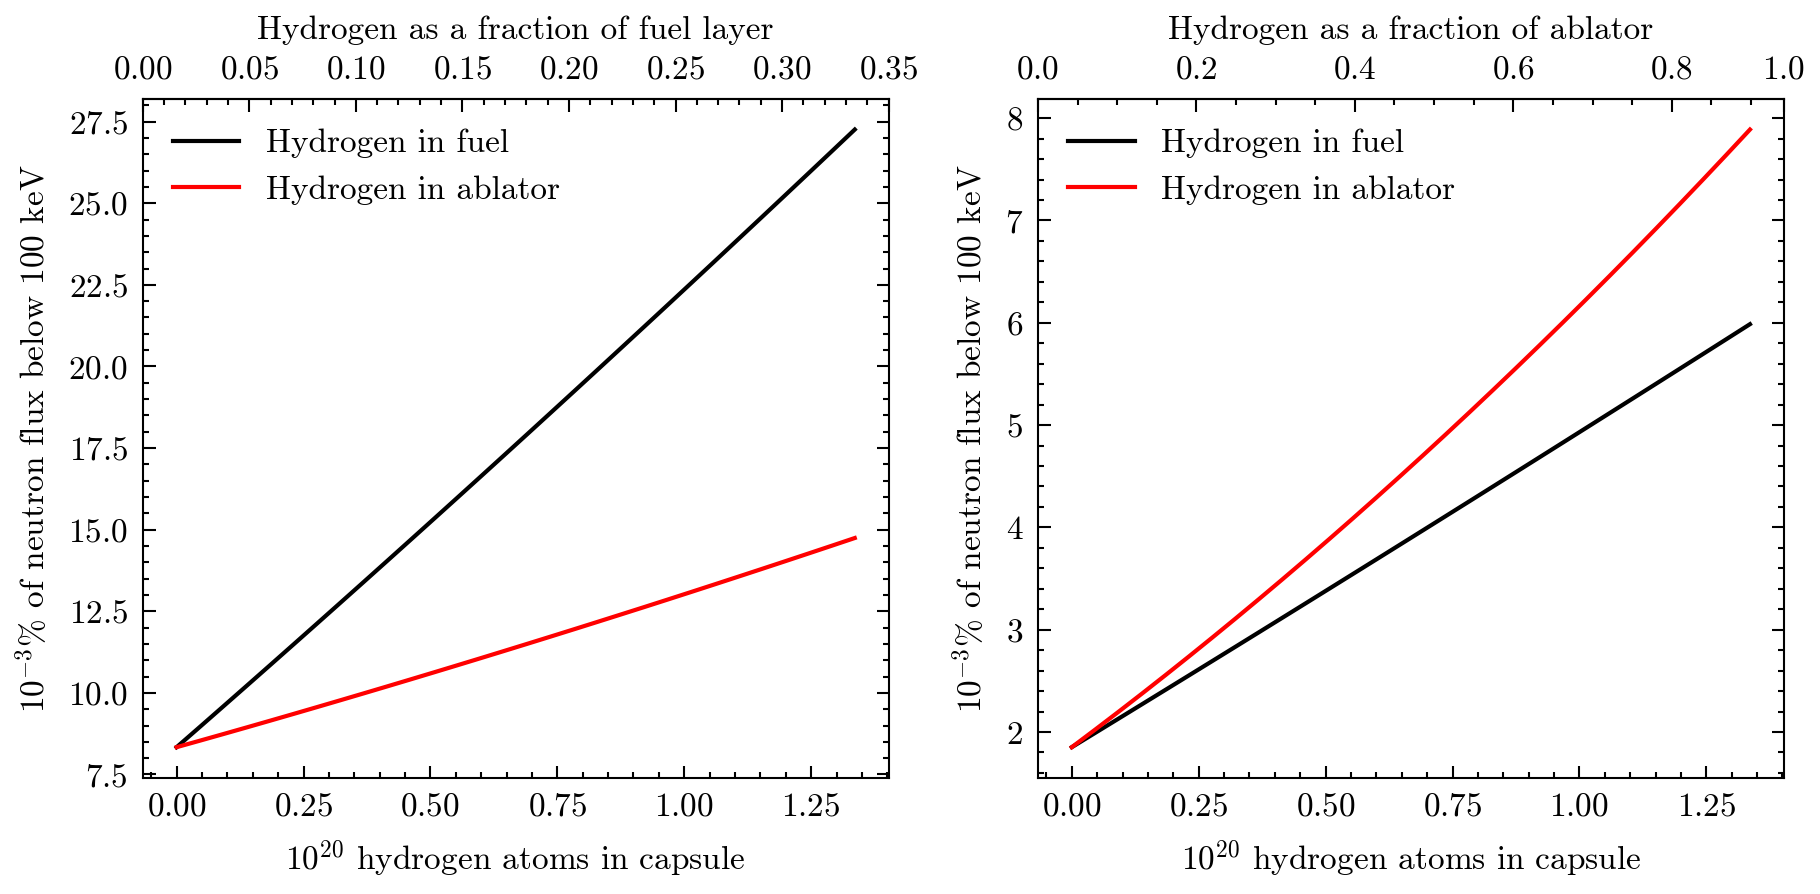

In [48]:
# it is much more effective to try and moderate DT filled PDXP capsule, so lets look at where the most effective position is to add the moderator
# linspace in classes can only go to 35% hydrogen because otherwise the ablator is more tha 100% hydrogen
scale=1.7
fig,axs = plt.subplots(1,2, figsize=(12/scale,5/scale))
# plt.subplots_adjust(hspace=0.8)

def forward(x):
    return np.interp(x, experiment.N_hydrogen/1e20, experiment.H_fraction_hotspot)
def inverse(x):
    return np.interp(x, experiment.H_fraction_hotspot, experiment.N_hydrogen/1e20)

def forward2(x):
    return np.interp(x, experiment.N_hydrogen/1e20, experiment.H_fraction_ablator)
def inverse2(x):
    return np.interp(x, experiment.H_fraction_ablator, experiment.N_hydrogen/1e20)



secax0 = axs[0].secondary_xaxis('top', functions=(forward,inverse))
secax0.set_xlabel('Hydrogen as a fraction of fuel layer')
axs[0].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom = True, top = False, labeltop = False)

secax1 = axs[1].secondary_xaxis('top', functions=(forward2,inverse2))
secax1.set_xlabel('Hydrogen as a fraction of ablator')
axs[1].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom = True, top = False, labeltop = False)

energy_range = 's100keV'

# =====================================================================================================
experiment = experiment_DD

divisor0, divisor1 = [np.float64(results_unmod_DD[f'{energy_range}_0']), np.float64(results_unmod_DD[f'{energy_range}_1'])]
# axs[0].plot([0],divisor0, 'x', color='black')
# axs[1].plot([0],divisor1, 'x', color='black')

divisor0, divisor1 = [1e-2, 1e-2]
divisor0, divisor1 = [1e-5, 1e-5]
# divisor0, divisor1 = [1e7, 1e7]



axs[0].plot(experiment.N_hydrogen/1e20, experiment.final_results_hotspot[f'{energy_range}_0']/divisor0, '-', label='Hydrogen in fuel')
axs[0].plot(experiment.N_hydrogen/1e20, experiment.final_results_ablator[f'{energy_range}_0']/divisor0, '-', label='Hydrogen in ablator')

axs[1].plot(experiment.N_hydrogen/1e20, experiment.final_results_hotspot[f'{energy_range}_1']/divisor1, '-', label='Hydrogen in fuel')
axs[1].plot(experiment.N_hydrogen/1e20, experiment.final_results_ablator[f'{energy_range}_1']/divisor1, '-', label='Hydrogen in ablator')

# axs[0].set_title('Neutron flux in fuel region')
# axs[1].set_title('Neutron flux in ablator')
# =====================================================================================================
# experiment = experiment_DD

# ax.plot(experiment.N_hydrogen/1e20, experiment.final_results_hotspot[f'{energy_range}_0']/1e7, label='DD fuel')
# axs[0].plot(experiment.N_hydrogen/1e20, experiment.final_results_ablator[f'{energy_range}_0']/1e4)

# axs[1].plot(experiment.N_hydrogen/1e20, experiment.final_results_hotspot[f'{energy_range}_1']/1e4, label='D fuel')
# axs[1].plot(experiment.N_hydrogen/1e20, experiment.final_results_ablator[f'{energy_range}_1']/1e4, label='Hydrogen in ablator')

# =====================================================================================================
# plot control case
# just as a check dont have this in pretty graph

# results_unmod_DD = neutron_counting(unmod_D_capsule, experiment_DD.time)
# axs[0].plot([0], results_unmod_DD[f'{energy_range}_0']/1e4, 'x', color='C0')
# axs[1].plot([0], results_unmod_DD[f'{energy_range}_1']/1e4, 'x', color='C0')

# results_unmod_DT = neutron_counting(unmod_DT_capsule, experiment_DT.time)
# axs[0].plot([0], results_unmod_DT[f'{energy_range}_0']/1e4, 'x', color='C1')
# axs[1].plot([0], results_unmod_DT[f'{energy_range}_1']/1e4, 'x', color='C1')
# =====================================================================================================





for ax in axs:
    ax.set_xlabel(r'$10^{20}$ hydrogen atoms in capsule')
    ax.set_ylabel(r'10$^{-3}$% of neutron flux below 100 keV')

axs[0].legend()
axs[1].legend()

# plt.savefig('/Users/brynlloyd/Desktop/moderating_PDXP.png', dpi=600)


In [9]:
from neutrons_code_L.functions import init_NeSST

En = np.geomspace(1e-5, 16, 500)[::-1]
init_NeSST(En)

# testing each of these two cases
# add 1e15 Tm atoms for each of the cases

# ====================================================================================================
# case 1: moderator and target in the fuel layer

# take the most extreme case from above
H_fraction = 0.35    # = 2.1e20 hydrogen atoms
fuel_fraction = (1-H_fraction)/2

case_1_params = np.array([[1e30, 0, 2*fuel_fraction, H_fraction, 0, 450e-6],
                        [1e30, 0, 0, 0, 1, 50e-6]])

target_number = 1e15
fuel_ion_number = 4 * np.pi / 3 * (450e-6)**3 * 1e30
target_fraction = target_number / fuel_ion_number
case_1_targets = [[['171Tm(n,G)', target_fraction]], None]

case_1 = Capsule(En, case_1_params, case_1_targets)
case_1.solve_neutron_transport()

# ====================================================================================================
# case 2: moderator and target in the ablator

# same number of hydrogen atoms as the case above
H_number = 1.34e20
ablator_volume = 4 * np.pi / 3 * (500e-6**3 - 450e-6**3)  # radii taken from PDXP params
H_fraction = H_number / (ablator_volume * 1e30)
fuel_fraction = (1 - H_fraction)/2


case_2_params = np.array([[1e30, 0, 2*fuel_fraction, H_fraction, 0, 450e-6],
                          [1e30, 0, 0, 0, 1, 50e-6]])


ablator_ion_number = 4 * np.pi / 3 * (500e-6**3 - 450e-6**3) * 1e30
target_fraction = target_number / ablator_ion_number
case_2_targets = [None, [['171Tm(n,G)', target_fraction]]]




case_2 = Capsule(En, case_2_params, case_2_targets)
case_2.solve_neutron_transport()

/Users/brynlloyd/Library/Python/3.9/lib/python/site-packages/NeSST/spectral_model.py:164: RuntimeWarning: invalid value encountered in sqrt
  kin_a  = np.sqrt((self.A/(self.A+1))**2*(1.0+(self.A+1)/self.A*self.inelastic_Q/Ei))


time taken to solve ODEs: 0.21886730194091797
time taken to solve ODEs: 0.3516390323638916


3.1256381026638493


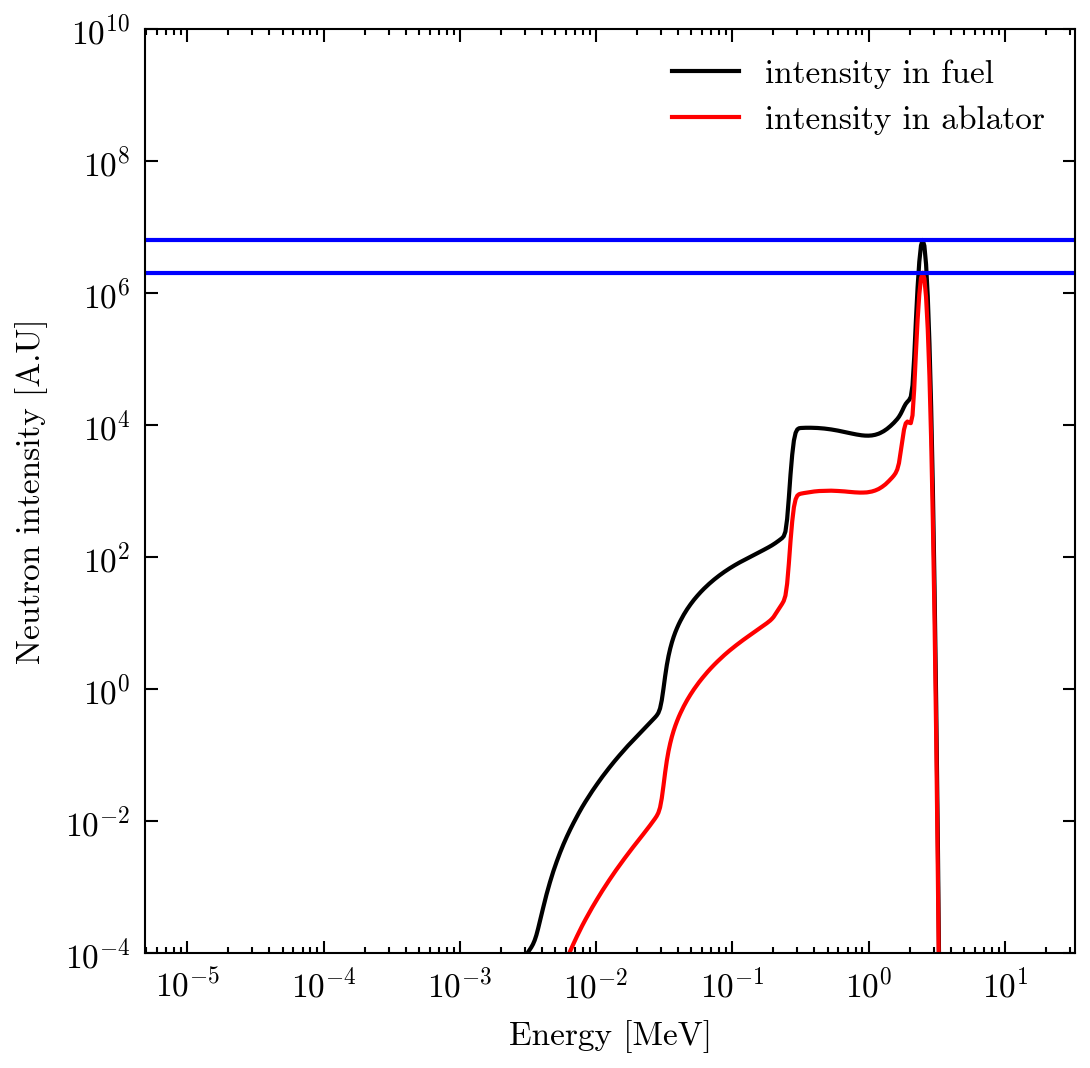

In [6]:
fig,ax = plt.subplots(figsize=(4,4))

time = 100


ax.loglog(unmod_D_capsule.En, unmod_D_capsule.Q[time, 0]*w, '-', label='intensity in fuel')
ax.loglog(unmod_D_capsule.En, unmod_D_capsule.Q[time, 1]*w, '-', label='intensity in ablator')
ax.legend()
ax.set_ylim([1e-4,1e10])
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('Neutron intensity [A.U]')


# showing flux difference at DD peak

y_1 = np.max(unmod_D_capsule.Q[time, 0]*w)
y_2 = np.max(unmod_D_capsule.Q[time, 1]*w)
ax.axhline(y=y_1, color='C2', linestyle='-')
ax.axhline(y=y_2, color='C2', linestyle='-')

print(y_1/y_2)

# plt.savefig('/Users/brynlloyd/Desktop/flux_difference.png', dpi=600)


Text(0, 0.5, 'Neutron flux [A.U]')

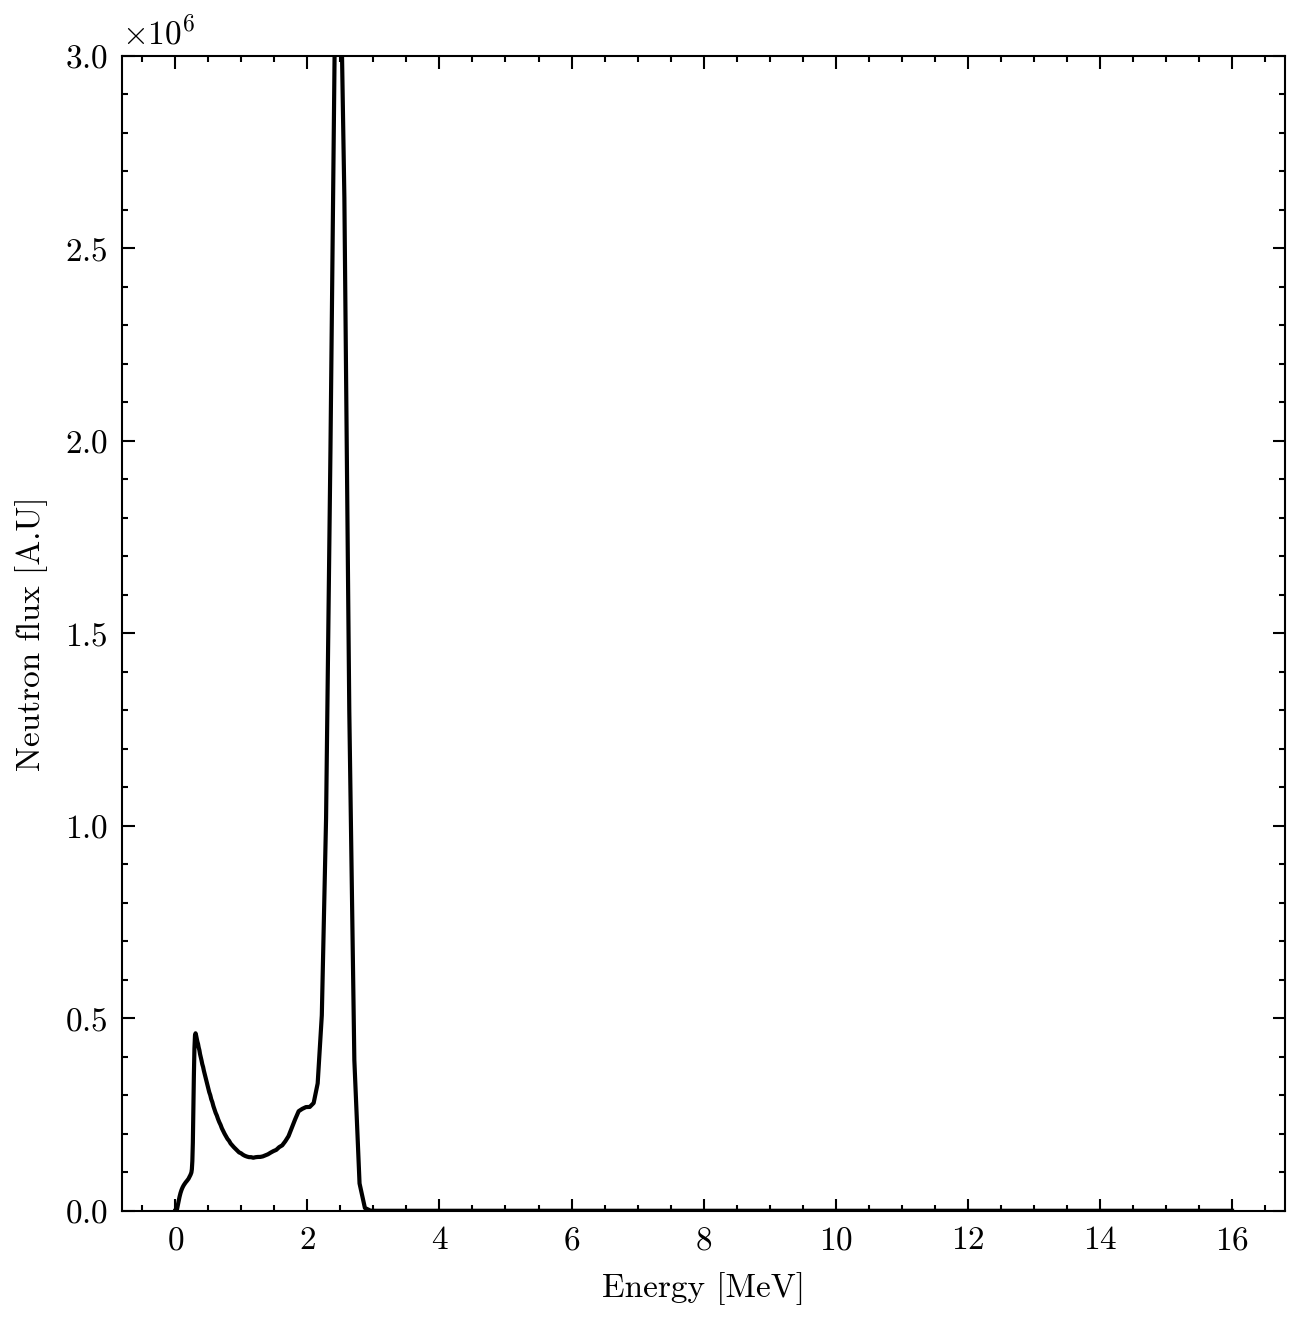

In [51]:
fig,ax = plt.subplots(figsize=(5,5))

ax.plot(unmod_D_capsule.En, unmod_D_capsule.Q[time, 0]*w, '-', label='intensity in fuel')
ax.set_ylim([0,3e6])
# ax.set_ylim([1,3e7])
# ax.set_xlim((0,4))

ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('Neutron flux [A.U]')

# plt.savefig('/Users/brynlloyd/Desktop/fuel_conc_lin.png', dpi=600)


time taken to solve ODEs: 0.44907617568969727


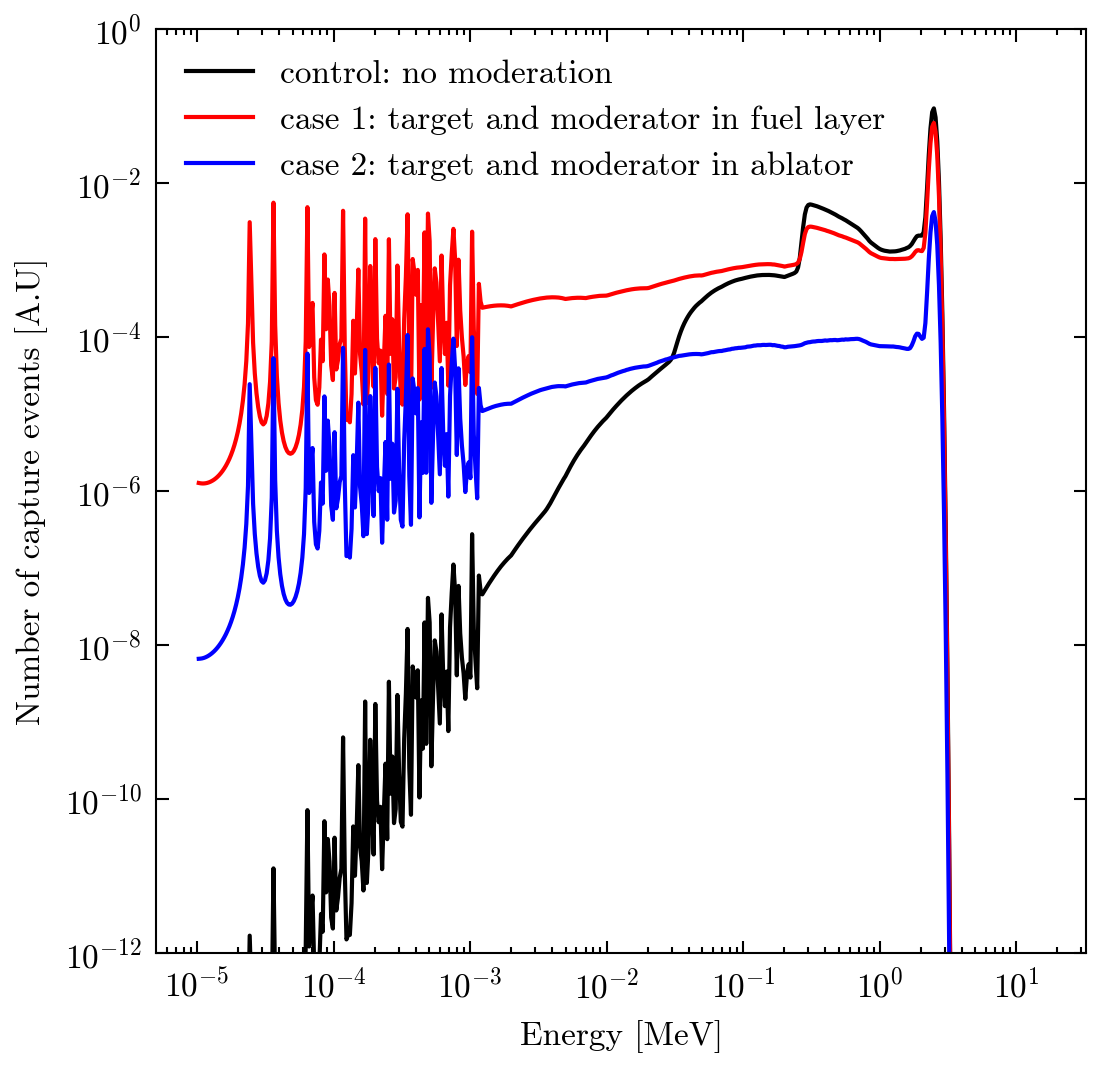

In [57]:
# moderation means that there is a good enhancement of low energy flux, but it is not good enough as it there is still a significant contribution to capture spectrum fro high energy neutrons

fig,ax = plt.subplots(figsize=(4,4))

time = 800

w = widths(En)

# unmoderated capture case

control = Capsule(En, unmoderated_D_params, case_1_targets)
control.solve_neutron_transport()
ax.loglog(control.En[:-1], (control.Q[time, -4]*w)[:-1]*1e6, '-', label = 'control: no moderation')



ax.loglog(case_1.En[:-1], (case_1.Q[time, -4]*w)[:-1]*1e6, '-', label = 'case 1: target and moderator in fuel layer')
ax.loglog(case_2.En[:-1], (case_2.Q[time, -4]*w)[:-1]*1e6, '-', label = 'case 2: target and moderator in ablator')







ax.set_ylabel('Number of capture events [A.U]')
ax.set_xlabel('Energy [MeV]')

ax.set_ylim([1e-12, 1])

ax.legend()

# plt.savefig('/Users/brynlloyd/Desktop/moderated captures.png', dpi=600)


In [ ]:
experiment_DD.N_hydrogen

array([0.00000000e+00, 4.60676647e+18, 9.21353294e+18, 1.38202994e+19,
       1.84270659e+19, 2.30338323e+19, 2.76405988e+19, 3.22473653e+19,
       3.68541318e+19, 4.14608982e+19, 4.60676647e+19, 5.06744312e+19,
       5.52811976e+19, 5.98879641e+19, 6.44947306e+19, 6.91014970e+19,
       7.37082635e+19, 7.83150300e+19, 8.29217964e+19, 8.75285629e+19,
       9.21353294e+19, 9.67420958e+19, 1.01348862e+20, 1.05955629e+20,
       1.10562395e+20, 1.15169162e+20, 1.19775928e+20, 1.24382695e+20,
       1.28989461e+20, 1.33596228e+20])

time taken to solve ODEs: 13.934216022491455


(1e-05, 100000.0)

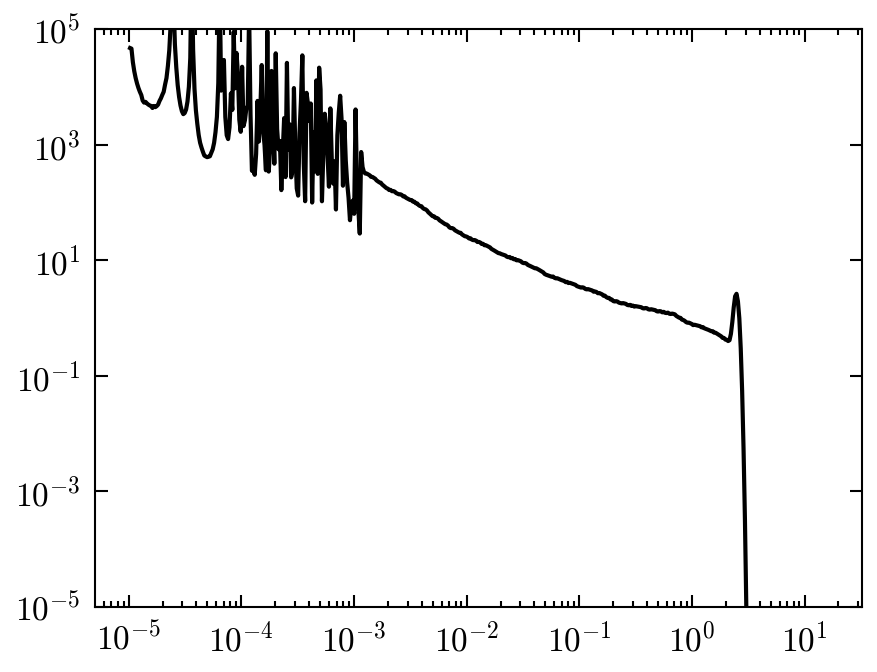

In [ ]:
max_mod_params = np.array([[1e30, 0, 1, 0, 0, 450e-6],
                           [1e34, 0, 0, 1, 0, 50e-6]])

mm = Capsule(En, max_mod_params, case_2_targets)
mm.solve_neutron_transport()

plt.loglog(mm.En[:-1], (mm.Q[time, -4]*w)[:-1]*1e6, '-', label = 'control: no moderation')
plt.ylim([1e-5, 1e5])


(1e-10, 1)

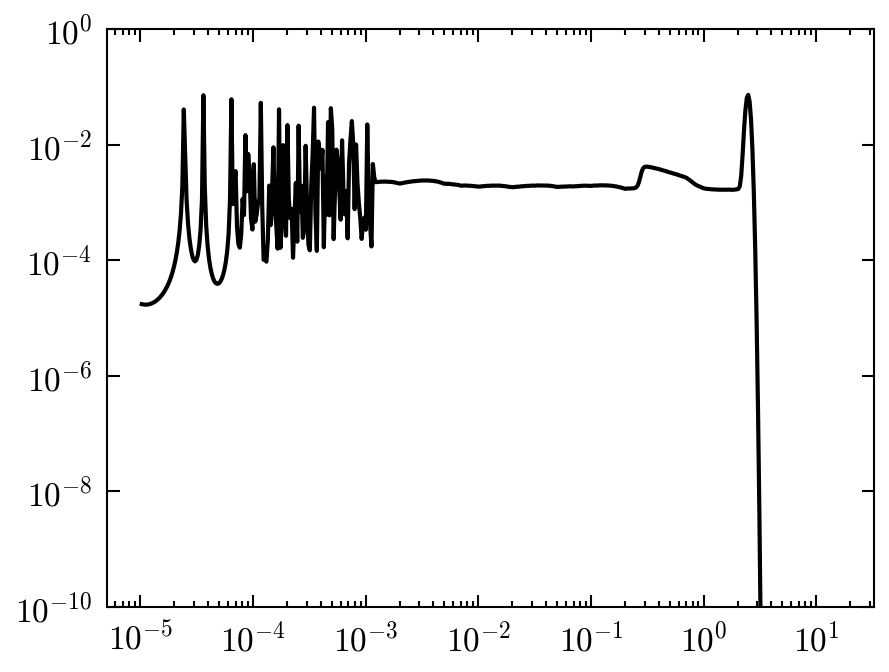